# EN LİNEER REGRESON 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("community_health_MLLR.csv")

In [4]:
df.head()

,age,cinsiyet,irk,kilo,boy,visits
0,47,0,4,111.0,165.0,28
1,26,1,3,127.0,168.0,23
2,26,1,2,90.0,173.0,14
3,39,1,3,107.0,185.0,21
4,55,1,1,90.0,155.0,27


In [5]:
df.rename(columns={"age":"yas"},inplace=True)

In [6]:
df.head()

,yas,cinsiyet,irk,kilo,boy,visits
0,47,0,4,111.0,165.0,28
1,26,1,3,127.0,168.0,23
2,26,1,2,90.0,173.0,14
3,39,1,3,107.0,185.0,21
4,55,1,1,90.0,155.0,27


# VERİ DÜZENLEME

In [7]:
df["vki"] = round(df["kilo"] / (df["boy"]/100)**2,2)
# Yeni bir değer ekledik ve hesaplattık

In [8]:
df.describe()

,yas,cinsiyet,irk,kilo,boy,visits,vki
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.019000,0.481000,3.15500,89.574000,170.914000,19.956000,31.271520
std,14.839166,0.499889,1.14817,23.759736,15.947694,6.455055,9.691236
min,0.000000,0.000000,1.00000,20.000000,117.000000,2.000000,6.920000
25%,36.000000,0.000000,2.00000,74.000000,160.000000,15.000000,24.772500
50%,45.000000,0.000000,3.00000,89.000000,170.000000,20.000000,30.300000
75%,55.000000,1.000000,4.00000,106.000000,183.000000,24.000000,37.025000
max,89.000000,1.000000,5.00000,160.000000,218.000000,40.000000,66.600000


In [39]:
df.isnull().sum()

yas         0
cinsiyet    0
irk         0
kilo        0
boy         0
visits      0
vki         0
dtype: int64

In [9]:
df.head()

,yas,cinsiyet,irk,kilo,boy,visits,vki
0,47,0,4,111.0,165.0,28,40.77
1,26,1,3,127.0,168.0,23,45.00
2,26,1,2,90.0,173.0,14,30.07
3,39,1,3,107.0,185.0,21,31.26
4,55,1,1,90.0,155.0,27,37.46


In [10]:
df.to_csv("community_health_evolved.csv" , index=False)

<Axes: xlabel='visits', ylabel='vki'>

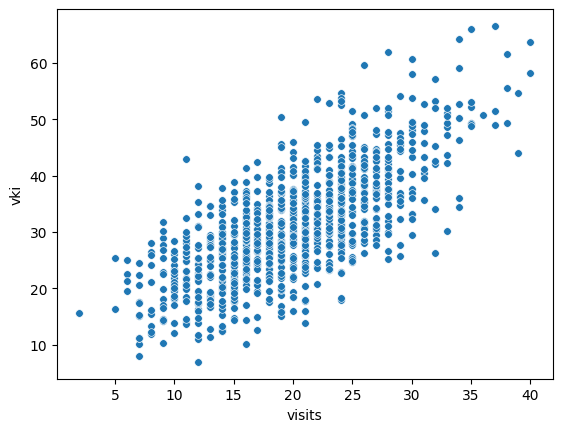

In [11]:
sns.scatterplot(data=df , x="visits" , y="vki" , s= 30)

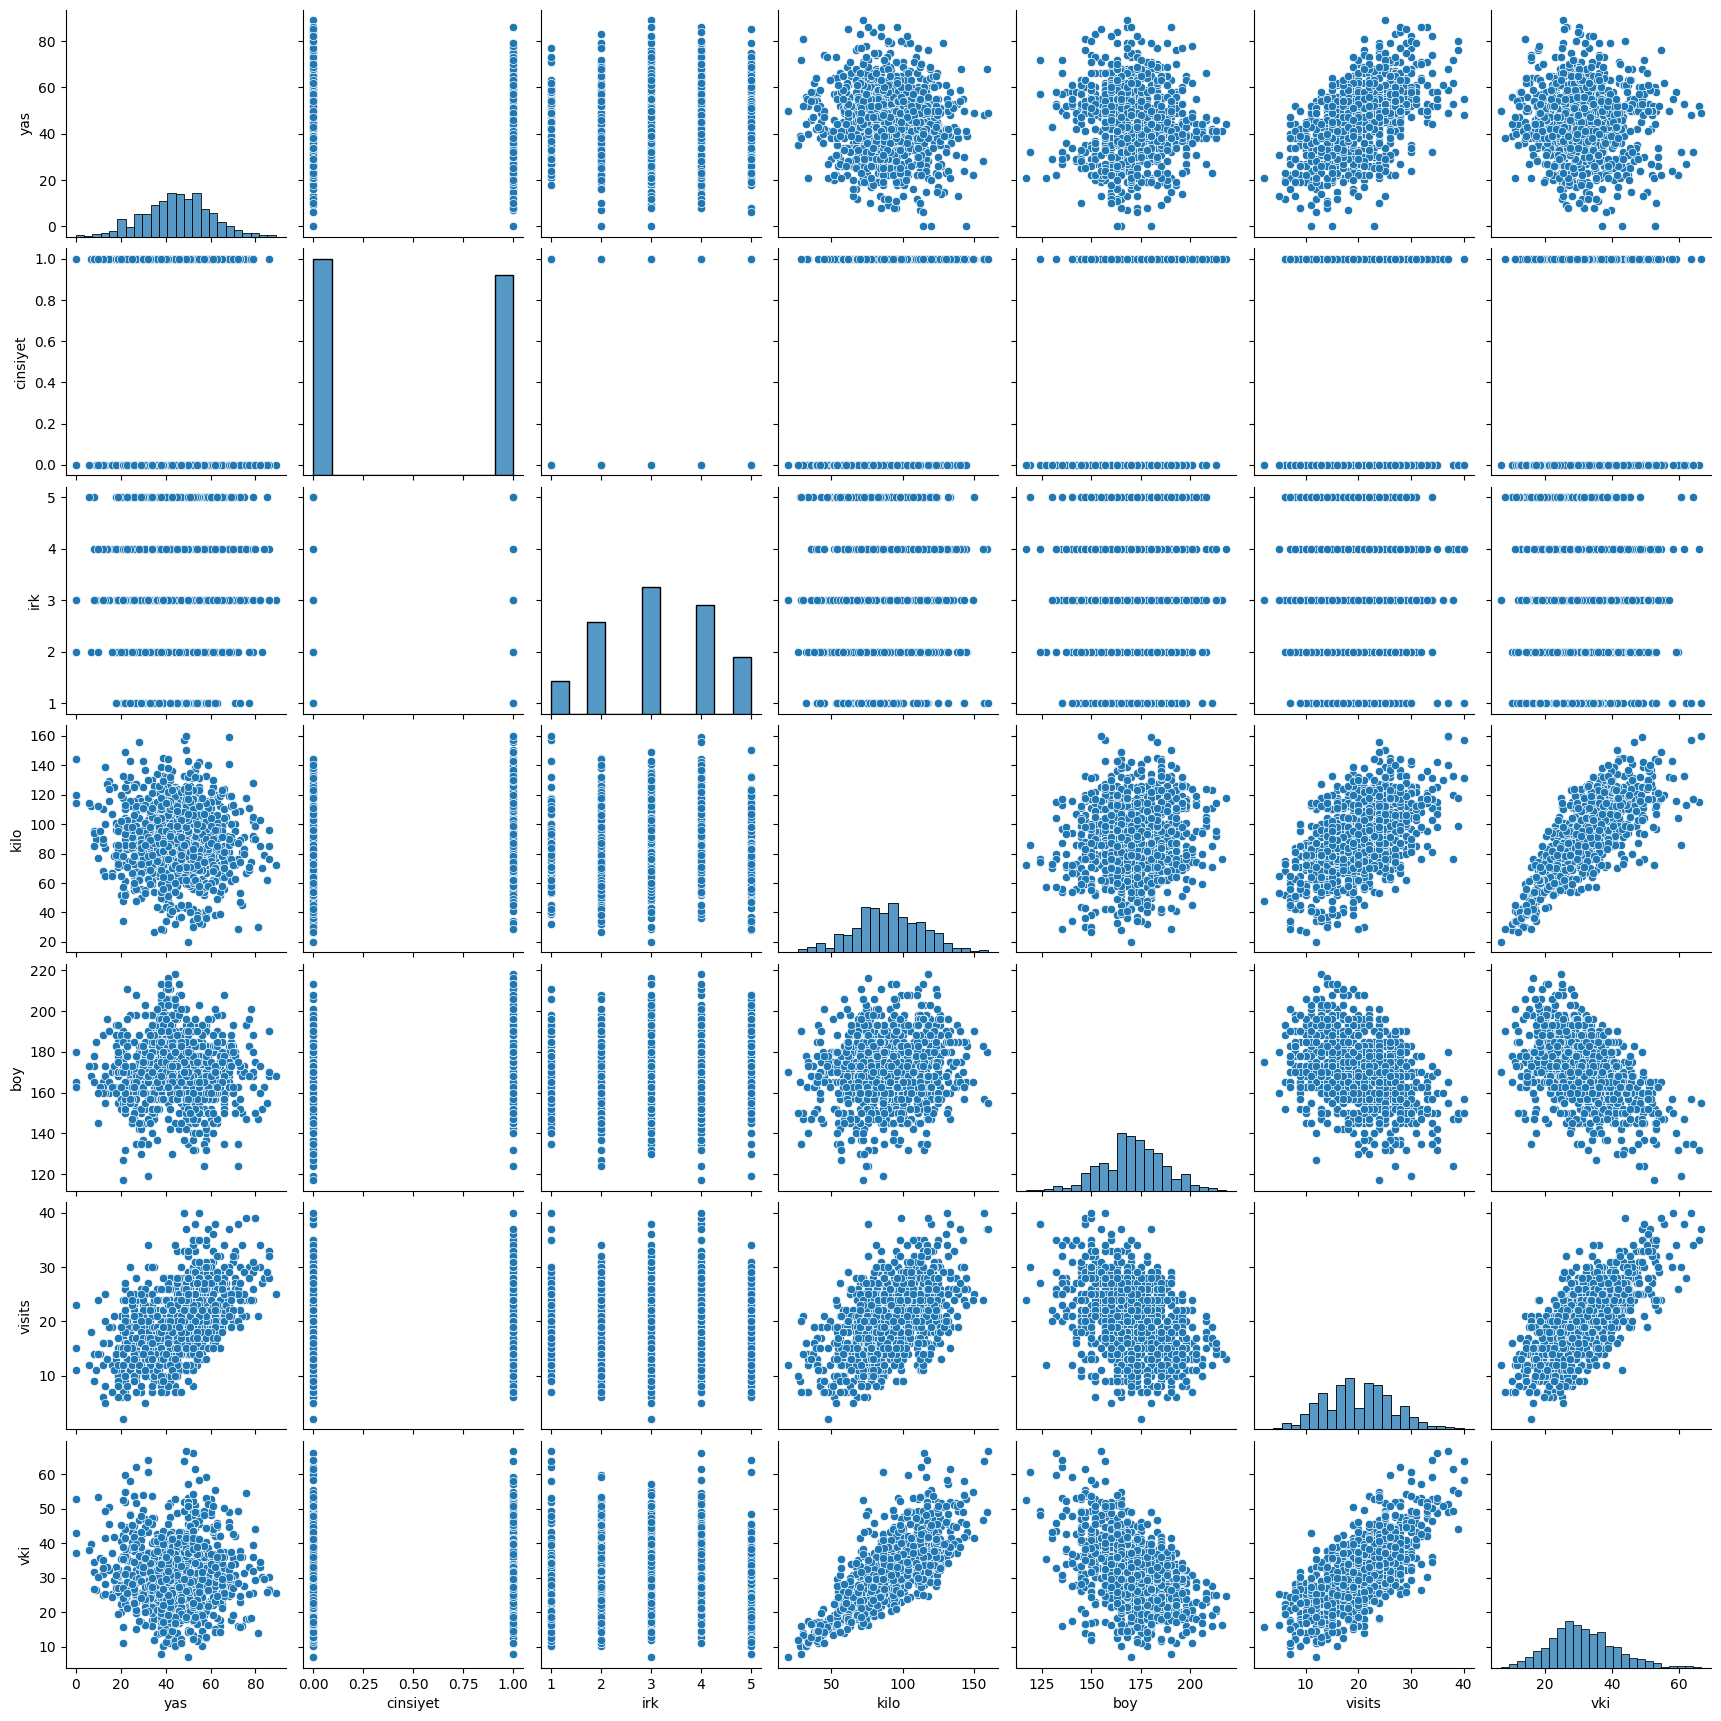

In [12]:
sns.pairplot(df)

In [42]:
df.corr()

,yas,cinsiyet,irk,kilo,boy,visits,vki
yas,1.000000,0.023866,0.009756,-0.084586,-0.063454,0.539543,-0.041481
cinsiyet,0.023866,1.000000,0.030425,0.272045,0.296501,0.066747,0.051005
irk,0.009756,0.030425,1.000000,0.018091,0.031233,0.006324,-0.005990
kilo,-0.084586,0.272045,0.018091,1.000000,0.141370,0.543433,0.772455
boy,-0.063454,0.296501,0.031233,0.141370,1.000000,-0.386140,-0.493038
visits,0.539543,0.066747,0.006324,0.543433,-0.386140,1.000000,0.723839
vki,-0.041481,0.051005,-0.005990,0.772455,-0.493038,0.723839,1.000000


# Train Test Split

In [14]:
x= df.drop("visits" , axis=1)
y=df["visits"]
# AXİS = 1 => SÜTÜN
# AXİS = 0 => SATIR

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x.head()

,yas,cinsiyet,irk,kilo,boy,vki
0,47,0,4,111.0,165.0,40.77
1,26,1,3,127.0,168.0,45.00
2,26,1,2,90.0,173.0,30.07
3,39,1,3,107.0,185.0,31.26
4,55,1,1,90.0,155.0,37.46


In [17]:
y.head()

0    28
1    23
2    14
3    21
4    27
Name: visits, dtype: int64

In [18]:
X_train , X_test , y_train ,  y_test = train_test_split (x,y,
                       test_size=0.33 , random_state=99)

In [19]:
X_train.head()

,yas,cinsiyet,irk,kilo,boy,vki
916,43,1,4,41.0,168.0,14.53
234,48,1,3,75.0,168.0,26.57
711,23,0,4,96.0,183.0,28.67
532,56,0,3,72.0,163.0,27.10
289,50,1,3,78.0,178.0,24.62


## Lin Rgr

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regr = LinearRegression()

In [22]:
regr.fit(X_train ,y_train)

LinearRegression()

In [23]:
test_pred= regr.predict(X_test)

In [24]:
test_pred

array([25.23916354, 16.57651671, 15.58461484, 12.19852668, 28.4951401 ,
       12.26422789, 18.4299277 , 14.60361972, 26.05268875, 16.32655633,
       13.64762321, 17.15372525, 17.20686126, 14.44339639, 28.05682424,
       11.89391615, 17.58091501, 21.55707995, 24.42916087, 12.58798275,
       11.55173052, 31.21067344, 20.09222854, 16.85964674, 22.25020538,
       22.72268746, 21.95906609, 14.72706037, 32.77047188, 16.17908377,
       18.06680977, 28.00108529, 22.57066194, 30.41600464, 27.20368819,
       13.99910749, 18.24243361, 20.66992265, 10.87180702, 24.51039359,
       18.90815838, 18.46032454, 24.65314137, 20.72472141, 13.22410632,
       17.07071546, 24.57703239,  8.7292943 , 19.80957485, 30.10016728,
       20.47117229, 24.08203512, 23.19812357, 16.50277629,  8.64686536,
       17.73121237, 14.5710119 , 17.11439934, 30.58895194, 20.67187436,
       21.55996554, 18.69893487, 13.04667602, 24.48759419, 17.82970734,
       14.48983168, 19.22161736, 13.93648482, 15.86768444, 36.76

# Performans

In [25]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [26]:
print("Theta :     ", (regr.coef_[0]))
print("Intercept : ", (regr.intercept_))
print("R^2 :       ", round(r2_score(y_test,test_pred),2))
print("MAE :       ", round(mean_absolute_error(y_test,test_pred),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,test_pred)),2))

Theta :      0.24778372395571807
Intercept :  -7.093467784724318
R^2 :        0.86
MAE :        2.1
RMSE :       2.46


## Final

In [27]:
final = LinearRegression()

In [28]:
final.fit(x,y)

LinearRegression()

In [29]:
y_hat = final.predict(x)# X i tahmin et

In [30]:
final.coef_

array([ 2.48792764e-01,  9.89529724e-02,  2.40831964e-02,  8.43108472e-03,
       -3.40674583e-05,  4.81692716e-01])

In [31]:
coef_df= pd.DataFrame(final.coef_ ,x.columns , columns=["Katsayılar"])

In [32]:
coef_df

,Katsayılar
yas,0.248793
cinsiyet,0.098953
irk,0.024083
kilo,0.008431
boy,-0.000034
vki,0.481693


In [33]:
hyso=[[20,1,2,82,187,82/1.87**2]]

In [34]:
final.predict(hyso)

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.92270258])

# RESİDUALS

In [35]:
residual = y_hat -y 

<Axes: xlabel='visits', ylabel='visits'>

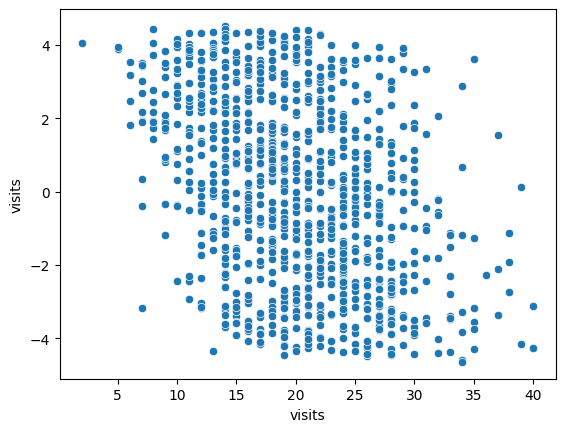

In [36]:
sns.scatterplot(x=y, y= residual)

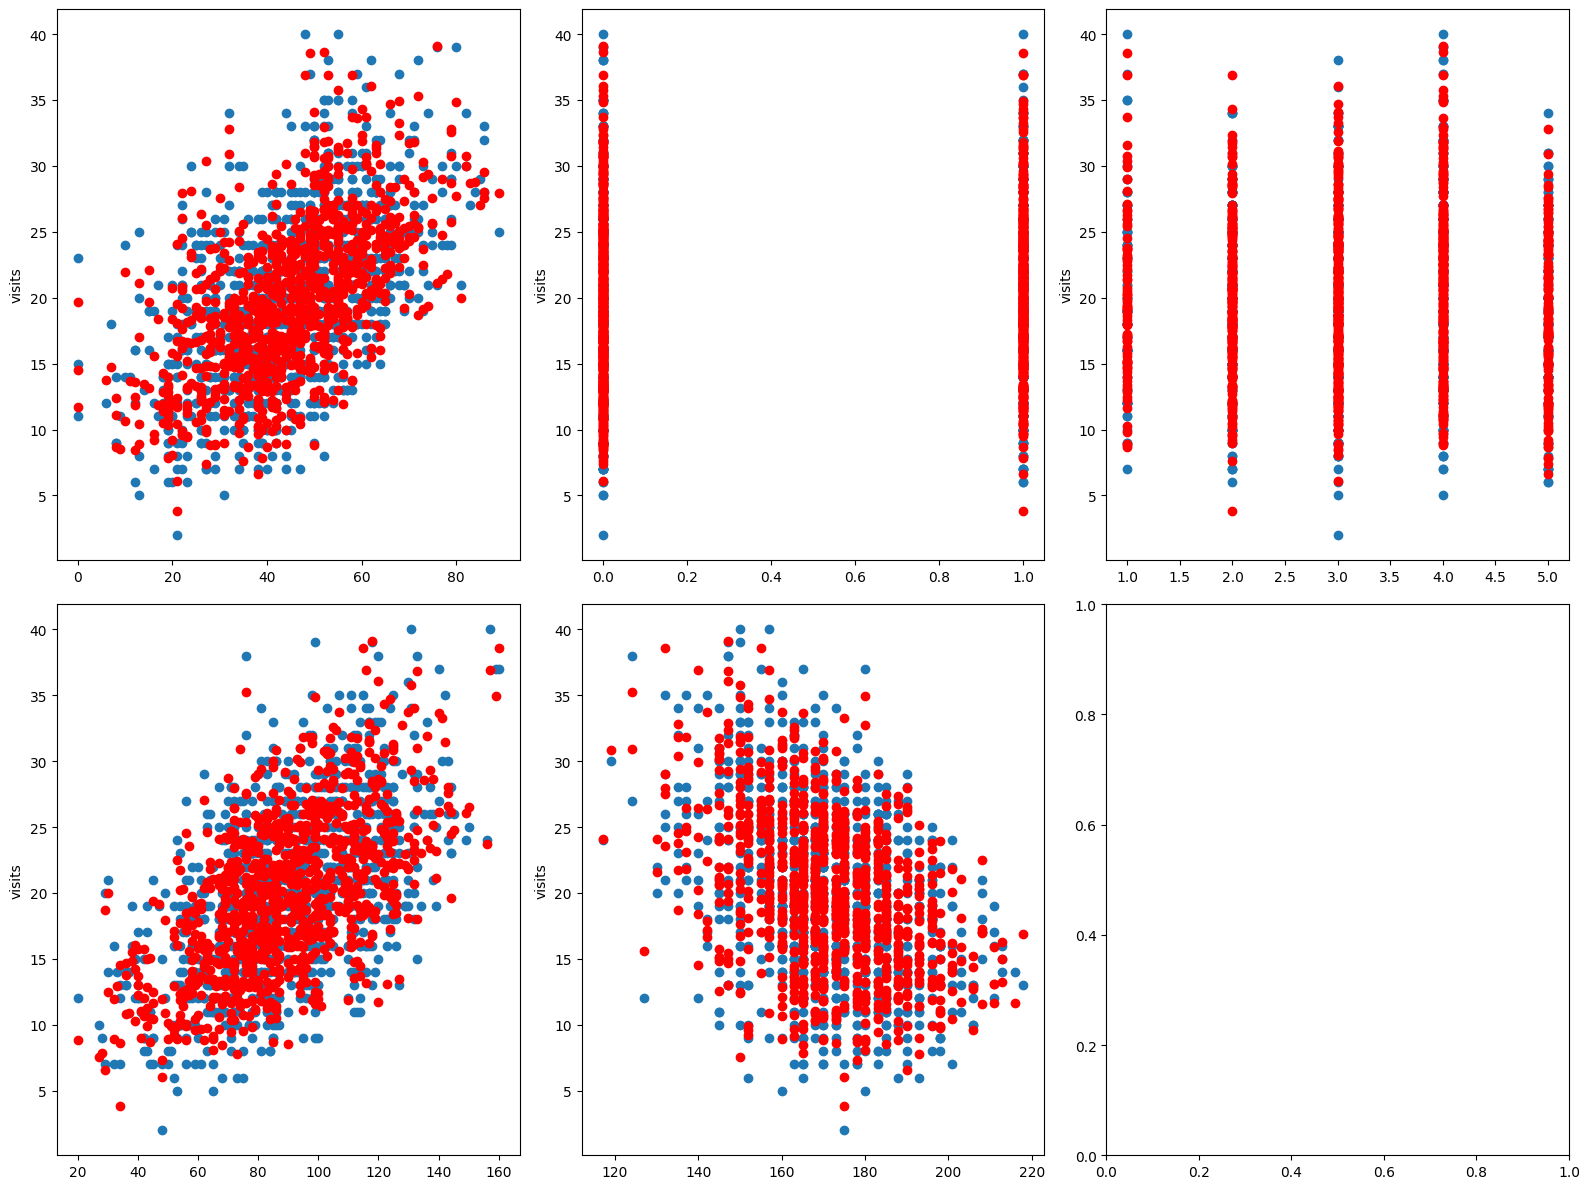

In [37]:
# 2 satır ve 3 sütundan oluşan bir grid (subplot) oluşturuyoruz, her bir grafiği bu eksenlere yerleştireceğiz
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

# İlk eksen: Age vs Visits (Gerçek veri ve tahminler)
axes[0, 0].plot(df['yas'], df['visits'], 'o')  # Gerçek 'visits' verisi ile scatter plot
axes[0, 0].plot(df['yas'], y_hat, 'o', color='red')  # Tahmin edilen 'visits' verisi (y_hat) kırmızı renk ile
axes[0, 0].set_ylabel("visits")  # Y eksenine etiket ekliyoruz (Visits)

# İkinci eksen: Cinsiyet vs Visits (Gerçek veri ve tahminler)
axes[0, 1].plot(df['cinsiyet'], df['visits'], 'o')  # Gerçek 'visits' verisi ile scatter plot
axes[0, 1].plot(df['cinsiyet'], y_hat, 'o', color='red')  # Tahmin edilen 'visits' verisi (y_hat) kırmızı renk ile
axes[0, 1].set_ylabel("visits")  # Y eksenine etiket ekliyoruz (Visits)

# Üçüncü eksen: Irk vs Visits (Gerçek veri ve tahminler)
axes[0, 2].plot(df['irk'], df['visits'], 'o')  # Gerçek 'visits' verisi ile scatter plot
axes[0, 2].plot(df['irk'], y_hat, 'o', color='red')  # Tahmin edilen 'visits' verisi (y_hat) kırmızı renk ile
axes[0, 2].set_ylabel("visits")  # Y eksenine etiket ekliyoruz (Visits)

# Dördüncü eksen: Kilo vs Visits (Gerçek veri ve tahminler)
axes[1, 0].plot(df['kilo'], df['visits'], 'o')  # Gerçek 'visits' verisi ile scatter plot
axes[1, 0].plot(df['kilo'], y_hat, 'o', color='red')  # Tahmin edilen 'visits' verisi (y_hat) kırmızı renk ile
axes[1, 0].set_ylabel("visits")  # Y eksenine etiket ekliyoruz (Visits)

# Beşinci eksen: Boy vs Visits (Gerçek veri ve tahminler)
axes[1, 1].plot(df['boy'], df['visits'], 'o')  # Gerçek 'visits' verisi ile scatter plot
axes[1, 1].plot(df['boy'], y_hat, 'o', color='red')  # Tahmin edilen 'visits' verisi (y_hat) kırmızı renk ile
axes[1, 1].set_ylabel("visits")  # Y eksenine etiket ekliyoruz (Visits)

# Alt satırdaki eksenlerin olduğu görsellerin düzeninin daha iyi olmasını sağlamak için
plt.tight_layout()  # Bu, grafiklerin sıkışmamasını ve düzgün yerleşmesini sağlar.
